In [77]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import json
import requests
import time
from citipy import citipy
from resources import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [53]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#random.sample(list,# of values) from citipy
cities = ["Paris", "London", "Oslo", "Beijing"]

In [54]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + api_key + "&q="

#test output to see API structure
test_url = query_url + "London"
print(test_url)

http://api.openweathermap.org/data/2.5/weather?appid=c745838b608b3e584a01c772f2c9bae4&q=London


In [55]:
#Perform a weather check on each of the cities using a series of successive API calls.
#API Unit Day 2, Activity 5

# set up lists to hold reponse info
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    #need to convert temp to F
    temp.append(response['main']['temp'])
    humid.append(response["main"]['humidity'])
    cloud.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])

In [56]:
# create a data frame from cities, lat, and lon
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humidity": humid,
    "cloudiness": cloud,
    "wind speed": wind
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lon,temp,humidity,cloudiness,wind speed
0,Paris,48.85,2.35,289.82,77,75,5.10
1,London,51.51,-0.13,289.67,63,75,10.30
2,Oslo,59.91,10.75,280.84,1,99,1.22
3,Beijing,39.91,116.40,303.29,68,100,3.15


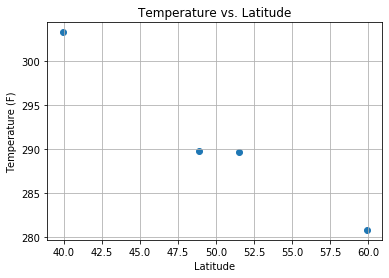

In [57]:
# Build a scatter plot for Temperature (F) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempVsLat.png")

In [58]:
#observations

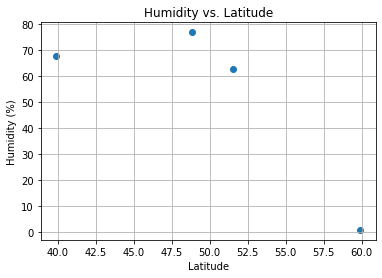

In [59]:
# Build a scatter plot for Humidity (%) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidVsLat.png")

In [60]:
#observations

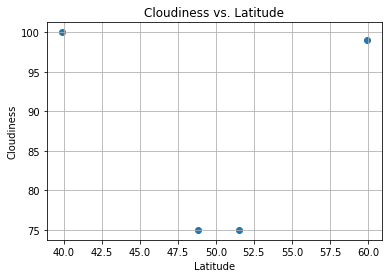

In [61]:
# Build a scatter plot for Cloudiness (%) vs. Latitude
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudVsLat.png")

In [62]:
#observations

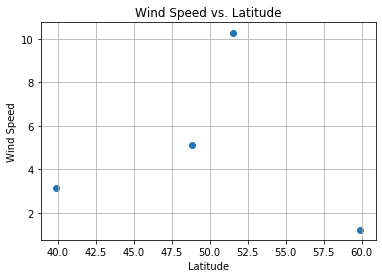

In [63]:
# Build a scatter plot for Wind Speed vs. Latitude
plt.scatter(weather_data["lat"], weather_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindVsLat.png")

In [64]:
#observations

C:\Users\halib\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\halib\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


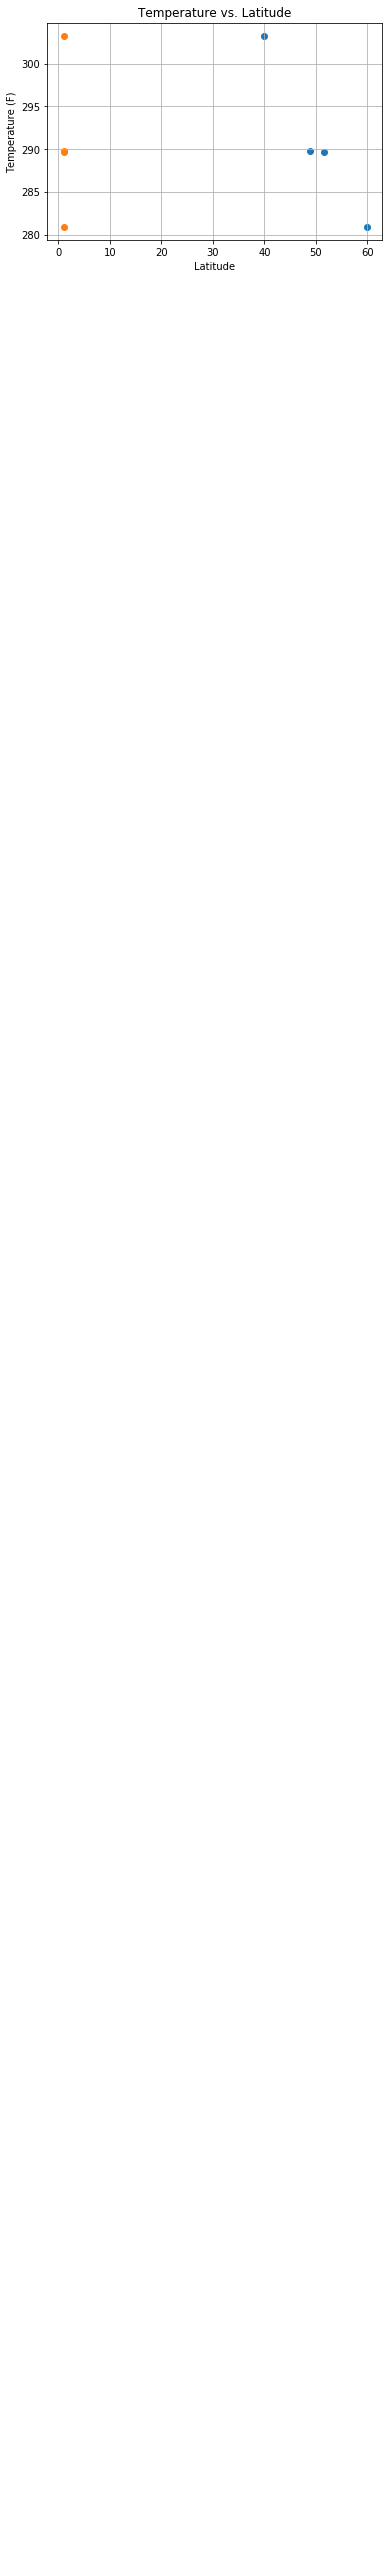

In [75]:
#Run linear regression on each relationship, only this time separating them into Northern Hemisphere 
#(greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
#Matplotlib Unit Day 3, Activity 8
# Northern Hemisphere - Temperature (F) vs. Latitude
#build scatter plot
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

#add linear regression (make var names unique)
x_values = weather_data['lat'] >= 0
y_values = weather_data['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show

# Save the figure
plt.savefig("TempVsLatRegress.png")

In [66]:
# Southern Hemisphere - Temperature (F) vs. Latitude

In [67]:
# Northern Hemisphere - Humidity (%) vs. Latitude

In [68]:
# Southern Hemisphere - Humidity (%) vs. Latitude

In [69]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

In [70]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

In [71]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude

In [72]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude